# <span style="color:red">MMP-6122 Reconocimiento de Patrones</span>

- ### Investigacion Corta 3
- ### Esteban Rivera
- ### Kevin Viquez

![Demo](HorizontalRule.png "Demo")

## <span style="color:red">Bibliography</span>

- Zheng, Alice. *Evaluating Machine Learning Models*. O'Reilly Media,Inc.
- https://scikit-learn.org (API Reference)
- https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234
- https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b
- https://www.machinelearningplus.com/machine-learning/evaluation-metrics-classification-models-r/
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">Metricas de Clasificacion</span>

- Accuracy
- Confusion Matrix
- Precision
- Recall
- F1 Score
- ROC (Receiver Operating Curve)
- ROC AUC (Area Under Curve)
- Per-Class Precision
- Logarithmic Loss
- Brier Score
- Jaccard Index

# <span style="color:red">Metricas de Regresion</span>

- Max Error
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)
- RMSE (Root Mean Square Error)
- R Squared


![Demo](HorizontalRule.png "Demo")

# <span style="color:red">Accuracy</span>

## En que consiste

La metrica de Accuracy mide que tan seguido el clasificador realiza una prediccion correcta. Es el radio entre el numero de predicciones correctas y el numero total de predicciones.

\begin{equation*}
Accuracy = \frac{Numero Predicciones Correctas}{Numero Predicciones Total}
\end{equation*}

## Casos de uso

- Proposito general en problemas de clasificacion
- Cuando las variables en los sets de datos son balanceadas.

## Ventajas

La mas simple de las metricas de evaluacion.

## Desafios

Dependiendo del set de datos utilizado para el entrenamiento, si este no es balanceado, puede dar falsos indices de precision.

No realiza distincion entre clases, las respuestas correctas para una clase o para otra clase son tratadas como iguales sin dar informacion sobre los fallos.


## Ejemplo

In [1]:
# Import metrics library
from sklearn.metrics import accuracy_score

# Imagine 2 vectors, one for the classifier prediction and one with expected values
#              o  o  x  o  o  o  x  x  x  o
y_predicted = [0, 1, 1, 3, 2, 3, 4, 1, 2, 5]
y_expected  = [0, 1, 2, 3, 2, 3, 1, 4, 1, 5]

\begin{equation*}
Accuracy = \frac{6}{10} = 0.6
\end{equation*}

In [2]:
accuracy_score(y_expected, y_predicted)

0.6

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">Confusion Matrix</span>

## En que consiste

Como su nombre lo indica esta metrica crea una matrix como salida y describe el desempeño completo del modelo. No solo muestra los aciertos y desaciertos en las predicciones sino que nos indica en que clases y con que frecuencia.    

![CFM](ConfusionMatrix.png "CFM")

### <span style="color:blue">Accuracy</span>
La precision del modelo se puede calcular:

![CFM](ConfusionMatrixModelAcc.png "CFM")

\begin{equation*}
Accuracy = \frac{True Positives + True Negatives }{True Positive + True Negative + False Positive + False Negative}
\end{equation*}

### <span style="color:blue">Precision</span>
La precision de cada clase se puede calcular:

![CFM](ConfusionMatrixClassAcc.png "CFM")

\begin{equation*}
Precision = \frac{True Positives}{True Positive + False Positive}
\end{equation*}

### <span style="color:blue">Tasa de Verdaderos Positivos (A.K.A Sensibilidad o Recall)</span>

Corresponde a la proporcion de verdaderos positivos predichos con respecto a todos los positivos que hubo, incluyendo los que se fallo en predecir.

![Demo](ConfusionMatrixSensibility.png "Demo")

\begin{equation*}
TruePositiveRate = \frac{TruePositives}{FalseNegatives + TruePositives}
\end{equation*}

Sensibilidad cuantifica el porcentaje de evacion de falsos negativos. Si la sensibilidad aumenta, la especificidad disminuye.

### <span style="color:blue">Tasa de Verdaderos Falsos (A.K.A Especificidad)</span>

Corresponde a la proporcion de verdaderos negativos predichos con respecto a todos los negativos que hubo, incluyendo los que se fallo en predecir.

![Demo](ConfusionMatrixSpecificity.png "Demo")

\begin{equation*}
TrueNegativeRate = \frac{TrueNegatives}{FalsePositives + TrueNegatives}
\end{equation*}

Especificidad cuantifica el porcentaje de evacion de falsos positivos. Si la especificidad aumenta, la sensibilidad disminuye.

## Casos de uso

- Clasificacion binaria
- Clasificacion multi-clase
- Clasificacion multi-etiqueta

## Ventajas

Muestra el desempeño completo del modelo y permite entender en donde estan las fallas y los aciertos.

## Desafios

Sacar provecho de sus resultados requiere de interpretacion y analisis adicional por parte del usuario

## Ejemplo Confusion Matrix

In [3]:
# Import library
from sklearn.metrics import confusion_matrix

y_expected  = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_predicted = ["ant", "ant", "cat", "cat", "ant", "cat"]

confusionMatrixResult = confusion_matrix(y_expected, y_predicted, labels=["ant", "bird", "cat"])

print (confusionMatrixResult)

[[2 0 0]
 [0 0 1]
 [1 0 2]]


![CFM](ConfusionMatrixExample.png "CFM")

La precision del modelo se puede calcular usando la diagonal:

\begin{equation*}
ModelAccuracy = \frac{2 (ants) + 0 (birds) + 2 (cats)}{6} = 0.666
\end{equation*}

In [4]:
accuracy_score(y_expected, y_predicted)

0.6666666666666666

Tambien se puede calcular la precision en la clasificacion de cada clase usando la informacion de su fila

\begin{equation*}
AntsPrecision = \frac{2 (true-ants)}{2 (true-ant) + 0 (false-bird) + 0 (false-cat)} = 1
\end{equation*}

\begin{equation*}
BirdsPrecision = \frac{0 (true-birds)}{0 (false-ant) + 0 (true-bird) + 1 (false-cat)} = 0
\end{equation*}

\begin{equation*}
CatsPrecision = \frac{2 (true-cat)}{1 (false-ant) + 0 (false-bird) + 2 (true-cat)} = 0.666
\end{equation*}

Estos mismos valores se pueden ver en la **diagonal** de la matrix normalizada:

In [5]:
# Imports
import numpy as np

confusionMatrixResult = confusionMatrixResult.astype('float') / confusionMatrixResult.sum(axis=1)[:, np.newaxis]

print (confusionMatrixResult)

[[1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.33333333 0.         0.66666667]]


## Ejemplos - Precision y Recall (Sensibility)

Usando SciKit Learn existen APIs para calcular varias de estas metricas (precision, sensibilidad, F1, etc) rapidamente. 

In [6]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat', 'dog'])

confusion_matrix(y_pred, y_true, labels=["cat", "dog", "pig"])

array([[2, 1, 0],
       [0, 0, 2],
       [0, 1, 0]])

![CFM](RecallExample.png "CFM")

In [7]:
precision_recall_fscore_support(y_true, y_pred, average=None, labels=['cat'])

# Cat Precision = tp/tp+fp  = 2/2+1 = 0.66
# Cat Recall    = tp/tp+fn  = 2/2+0 = 1
# Cat F_Score   = 2*P*R/P+R = 2*1*0.66/1+0.66 = 0.8 

(array([0.66666667]), array([1.]), array([0.8]), array([2]))

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">Per-Class Precision Average</span>

## En que consiste

En el ejemplo anterior de *Confusion Matrix* se encontraron 4 valores de precision

| Precision                             | Valor(%) |
| ------------------------------------- | -------- |
| MicroPrecision (A.K.A Accuracy_Score) | 66.66    |
| Precision Clase *Ant*                 | 100      |
| Precision Clase *Bird*                | 0        |
| Precision Clase *Cat*                 | 66.66    |

En casos de clasificacion en donde existen multiples clases puede ser muy util calcular la *Macro Precision*, para analizar el balance en la clasificacion de las clases:

\begin{equation*}
PerClassAccuracyAverage = \frac{Accuracy Clase 1 + Accuracy Clase 2 + ... + Accuracy Clase N }{Numero de Clases Total}
\end{equation*}

## Casos de uso

- Clasificacion multi-clase

## Ventajas

Otra herramienta mas para ayudar a identificar sets de datos desbalanceados, ayuda junto con las precisiones individuales por clase a identificar cuan desbalanceado es un set de datos

## Desafios

Su resultado requiere de interpretacion experta porque si existen muchos ejemplos de una clase y muy pocos de otra, calcular el promedio de las podria disminuir la medida de confiabilidad de la precision de las clases individuales.

## Ejemplo

In [8]:
# Imports 
import numpy as np
import statistics as s

# Using the results from the previous Confusion Matrix
AccuracyPerClass = confusionMatrixResult.diagonal()

print(AccuracyPerClass)

[1.         0.         0.66666667]


In [9]:
s.mean(AccuracyPerClass)

0.5555555555555556

El valor de macro-precision obtenido de haber promediado la precision por clase, nos muestra que hay un desbalance en el exito de las predicciones por clase

| Precision                             | Valor(%) |
| ------------------------------------- | -------- |
| MicroPrecision (A.K.A Accuracy_Score) | 66.66    |
| Precision Clase *Ant*                 | 100      |
| Precision Clase *Bird*                | 0        |
| Precision Clase *Cat*                 | 66.66    |
| MacroPrecision                        | 55.55    |

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">F1 Score</span>

Realmente no deseamos andar calculando las metricas anteriores, generalmente deseammos tener un solo valor que nos indique la ambas. Para esto podemos tomar la media artimetica como base. Veamos un ejemplo, tenemos 100 transacciones bancarias, de las cuales 97 son legitimas y 3 son fraudes. Asumamos que teniamos un modelo que predijo todo como un fraude:

| Predicted \ Actual  | Fraud | Not Fraud |
| --- | --- | --- |
| __Fraud__ | 3 | 97 |
| __Not Fraud__ | 0 | 0 |

Utilizando las metricas de precision y Sensibilidad, obtenemos: 

\begin{equation*}
Precision = \frac{3}{100} = 3 \%
\end{equation*}


\begin{equation*}
Sensibilidad = \frac{3}{3} = 100 \%
\end{equation*}

Ahora con la media aritmética tenemos que arroja el valor de 51%. Dicho valor no tiene sentido para el modelo planteado que predijo que todo era un fraude. 
Necesitamos un modelo mas robusto y mejor balanceado que la media aritmetica. La media harmonica viene a cumplir un papel en esta metrica. 

\begin{equation*}
Media Harmonica = \frac{2 * x * y}{x + y}
\end{equation*}


La media armónica es casi un promnedio cuando los valores x, y, son iguales. Por otro lado, la media harmonica se aproxima al valor menor cuando x, y son diferentes.

Aplicando la media harmónica al ejemplo anterior,  con P como precisión y R como Recall(Sensibilidad), obtenemos:


\begin{equation*}
F1 Score = \frac{2 * P * R}{P + R}
\end{equation*}

\begin{equation*}
F1 Score = \frac{2 * 3 * 100}{3 + 100}
\end{equation*}

\begin{equation*}
F1 Score = 5.8\%
\end{equation*}


El resultado obtenido es pequeño por lo tanto da una señal de que uno de los valores también es muy pequeño, siendo un valor más realista que describe el modelo utilizado. 


## Casos de Uso

Generalmente es utilizado con la métricas de Precisión y Sensibilidad.


## Ventajas 

- Genera un solo valor que da un señal de cómo está el modelo en cuanto la precisión y sensibilidad.


## Desafios

- Trata todos los datos obtenidos equitativamente. Es decir, un resultado en la posición k es igual de importante que un resultado en la posicion l.

## Ejemplos

In [10]:
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
f1_score(y_true, y_pred, average='macro')  
#0.26...

0.26666666666666666

In [11]:
f1_score(y_true, y_pred, average='micro')  
#0.33...

0.3333333333333333

In [12]:
f1_score(y_true, y_pred, average='weighted')  
#0.26...

0.26666666666666666

In [13]:
f1_score(y_true, y_pred, average=None)
#array([0.8, 0. , 0. ])

array([0.8, 0. , 0. ])

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">ROC (Receiver Operating Curve) and its AUC (Area Under the Curve)</span>

## En que consiste

Ampliamente utilizado en problemas de clasificacion binaria. Los ROC son graficas que muestran la relacion de la sensibilidad y la especifidad de un modelo, cada par ordenado se puede extraer de la matriz de confusion obtenida despues de entrenar y poner a prueba a un modelo de clasificacion.

El ROC permite de manera grafica evaluar la eficacia de un clasificador binario al plotear los resultados de sus diferentes iteraciones en una sola curva.

![Demo](ROCPlotPoint.png "Demo")

Tiene dos funciones principales:

Primero, permite comparar resultados de desempeño de un modelo cuando se varian las probabilidades numericas de los limites de desicion

![Demo](ROC.png "Demo")

Segundo, el Area bajo la curva es un cuantificador de cuan bueno es un modelo, su valor maximo es **1** y se puede utilizar para comparar desempeño entre modelos de clasificadores

![Demo](ROC_AUC.png "Demo")

## Casos de uso

- Clasificacion binaria
- Clasificacion multi-etiqueta

## Ventajas

Resume en una grafica el comportamiento del modelo ante variaciones de sus hiperparametros para que el usuario decida cuales son los valores optimos para resolver su problema

## Desafios

- Requiere de interpretacion experta
- Es laborioso crear las curvas

## Ejemplo

In [14]:
# Imports
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Generate 2 class dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[1,1], random_state=1)
# Split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# Fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)
# Predict probabilities
probs = model.predict_proba(testX)
# Keep probabilities for the positive outcome only
probs = probs[:, 1]

Se toman las probabilidades numericas de las predicciones del clasificador para usarlas como valores de umbral de prueba y ver como cambiaria el comportamiento del modelo si fueran utilizadas como el criterio de decision.

In [15]:
# Calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)

# Calculate roc curve points
fpr, tpr, thresholds = roc_curve(testy, probs)

# Print the threshould we are going to be testing with ROC
print ("\nThresholds")
print(list(map('{:.3f}%'.format,thresholds)))

# Print the (x,y) coordinates of the data points
print ("\nTrue Positive Rate")
print(list(map('{:.3f}%'.format,tpr)))

print ("False Positive Rate")
print(list(map('{:.3f}%'.format,fpr)))

AUC: 0.895

Thresholds
['2.000%', '1.000%', '0.667%', '0.333%', '0.000%']

True Positive Rate
['0.000%', '0.562%', '0.884%', '0.975%', '1.000%']
False Positive Rate
['0.000%', '0.054%', '0.217%', '0.407%', '1.000%']


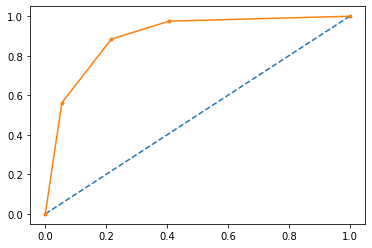

In [16]:
# Plot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# Show the plot
pyplot.show()

A partir de este punto se requiere de interpretacion por parte del usuario para decidir cuantos falsos positivos se puede permitir para el problema en analisis.

Por ejemplo:
- Si se usa un umbral de decision de 66% en la clasificacion, se obtendran un 88.4% de Verdaderos Positivos pero un 21.7% de Falsos Positivos
- Si se usa un umbral de decision de 33% en la clasificacion, se obtendran un 97.5% de Verdaderos Positivos pero un 40.7% de Falsos Positivos

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">Logarithmic Loss</span>

## En que consiste

Analiza la salida cruda de un clasificador cuando su salida es una probabilidad numerica en lugar de una variable booleana. Esta probabilidad se puede usar como un indice de confiabilidad.

La clasificacion boleana (0 ó 1) se puede ver en terminos numeros como probabilidad por arriba y por debajo de 0.50, siendo clase 0 si el valor es igual o menor que 0.50, y clase 1 si el valor es mayor o igual que 0.51.

El analisis logaritmo analiza los fallos y aciertos en terminos de estas probabilidades numericas para ver que tan contundentes son los aciertos y los desaciertos. Valores cercanos a 0.50 tienen la probabilidad de ser clasificados como cualquiera de las dos clases, lo ideal es lograr resultados tan cerca de los extremos (0 ó 1) como sea posible.

Matematicamente para un clasificador binario se define como:

\begin{equation*}
LogLoss = \frac{-1}{N} \sum_{i=1}^N y_i \times log p_i + (1-y_i) \times log(1-p_i)
\end{equation*}

*Logarithmic Loss* es la entropia cruzada entre las distribuciones de valores esperados y de predicciones, la entropia mide la inprevisibilidad de algo, en este caso, mide el "ruido" que provoca el modelo predictor y que causa que el vector de salidas del predictor no sea igual al vector de valores esperados.

Minimizar ese "ruido" es equivalente a mejorar el desempeño del modelo de prediccion.

## Casos de uso

- Clasificacion multi-etiqueta
- Clasificacion multi-clase
- Cuando la salida de un algoritmo clasificador es una probabilidad numerica en lugar de una variable booleana

## Ventajas

Un metrica de evaluacion mas meticulosa que accuracy_score y que busca no solo analizar las predicciones correctas, sino tambien cuantificar cuan cerca o lejos estuvieron del limite de decision

## Desafios

Trabajar con escala logaritmica no es intuitivo

## Ejemplo

In [17]:
# Imports
from sklearn.metrics import log_loss

# Perfect prediction
actual_labels = ["ant", "bird", "cat"]
log_loss(actual_labels,  [[1, 0, 0], [0, 1, 0], [0, 0, 1]])

2.1094237467877998e-15

In [18]:
# Completely wrong prediction in all 3 cases
log_loss(actual_labels,  [[0, 0, 1], [0, 0, 1], [1, 0, 0]])

34.538776394910684

In [19]:
# Prediction with non binary probabilities
log_loss(actual_labels,  [[0.35, 0.65, 0], [0, 0.70, 0.30], [0.2, 0.2, 0.6]])

0.639107564067801

## Ejemplo con Random Forest

In [20]:
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

# Generate data
X, y = make_blobs(n_samples=1000, n_features=2, random_state=42, cluster_std=5.0)

# Divide the data in training-set and testing-set
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# Train uncalibrated random forest classifier on whole train and validation
# data and evaluate on test data
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train, y_train)

# Get predictions and predictions probabilities
y_predict = clf.predict(X_test)
y_predict_probability = clf.predict_proba(X_test)

# Get the accuracy and logaritmic loss metrics
accuracy_score = accuracy_score(y_test, y_predict)
logloss_score = log_loss(y_test, y_predict_probability)

print("Test accuracy = {}".format(accuracy_score))
print("Log-Loss = {:0.3f}".format(logloss_score))

Test accuracy = 0.78
Log-Loss = 1.289


![Demo](HorizontalRule.png "Demo")

# <span style="color:red">Brier Score</span>

## En que consiste

Se suele interpretar como una medida de la "calibration" de un set de predicciones probabilisticas, o como una funcion de costo. La metrica de Brier mide la diferencia media cuadratica entre:

- La probabilidad predicha para el item *i*
- El valor actual del item *i*

\begin{equation*}
Brier Score = \frac{1}{N} \sum_{t=1}^N (f_t-o_t)^2
\end{equation*}

Su valor se encuentra en 0 y 1, siendo 0 el mejor resultado y 1 el peor.

## Casos de uso

- En clasificacion binaria
- Prediccion es una probabilidad numerica

## Ventajas

Mide el desempeño como si fuera una funcion de costo, sumando error por cada prediccion

## Desafios

No es apropiado cuando ocurren eventos con baja o alta frecuencia porque no puede discriminar los cambios en la prediccion que son significantes

## Ejemplo

In [21]:
import numpy as np
from sklearn.metrics import brier_score_loss

y_prob = np.array([0.1, 0.9, 0.8, 0.3])
y_true = np.array([0, 1, 1, 0])

# How to calculate Brier score manually
# - We expected not to rain (P=0.1) and it didn't rain (0) = (0.1-0)^2
# - We expected rain (P=0.9) and it rained (1)             = (0.9-1)^2
# - We expected rain (P=0.8) and it rained (1)             = (0.8-1)^2
# - We expected not to rain (P=0.3) and it didn't rain (0) = (0.3-0)^2

# Now we apply the formula
# ((0.1-0)^2 + (0.9-1)^2 + (0.8-1)^2 + (0.3-0)^2) / 4
# (0.01 + 0.01 + 0.04 + 0.09) /4 = 0.0375

brier_score_loss(y_true, y_prob)

0.03749999999999999

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">Jaccard Score</span>

## En que consiste

Es una estadistica utilizada para medir la similaridad y diversidad de sets de muestras. Se define como la division de la interseccion de los grupos entre su union.

\begin{equation*}
Jaccard Index = \frac{A \bigcap B}{A \bigcup B}
\end{equation*}

Su valor se encuentra en 0 y 1, siendo 1 el mejor resultado y 0 el peor.

## Casos de uso

- Clasificacion multi-etiqueta
- Comparacion entre grupos de datos

## Ventajas

Mide similitud entre datos

## Desafios

La similitud entre los grupos de datos dice poco de como mejorar la configuracion del modelo de clasificacion

## Ejemplo

In [22]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

list1 = [0,1,2,5,6,0,1]
list2 = [0,2,3,4,5,7,9]

# Jaccard measures how similar are 2 groups by dividing their intersection by their union
# J(A,B) = |A∩B| / |A∪B| 
#        = |{0,2,5}| / |{0,1,2,3,4,5,6,7,9}| 
#        = 3/9 = 0.33

jaccard_similarity(list1, list2)

0.3333333333333333

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">Resumen de Metricas para Clasificacion</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-0pky">Metrica</th>
    <th class="tg-0pky">Caso de Uso</th>
    <th class="tg-0pky">Ventaja</th>
    <th class="tg-0pky">Desafio</th>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">Accuracy Score</td>
    <td class="tg-0pky" align="right">- Proposito general</td>
    <td class="tg-0pky" align="right">- Simplicidad</td>
    <td class="tg-0pky" align="right">- No distingue entre clases<br>- No muestra informacion sobre fallas</td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">Confusion Matrix</td>
    <td class="tg-0pky" align="right">- Clasificacion binaria<br>- Clasificacion multi-clase<br>- Clasificacion multi-etiqueta</td>
    <td class="tg-0pky" align="right">- Muestra desglose de aciertos y fallas<br>- Base para calcular muchas otras metricas</td>
    <td class="tg-0pky" align="right">- Para sacarle provecho a los resultados requiere de analisis adicional por parte del usuario</td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">Presicion-Sensitividad</td>
    <td class="tg-0pky" align="right">- Clasificacion binaria<br>-Clasificacion multi-etiqueta</td>
    <td class="tg-0pky" align="right">- Simplicidad</td>
    <td class="tg-0pky" align="right">- Uno afecta al otro<br>- No es facil de optimizar si no hay objetivos claros<br>- Base para calcular muchas otras metricas</td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">F1 Score</td>
    <td class="tg-0pky" align="right">-Clasificacion multi-etiqueta<br>- Clasificacion multi-clase</td>
    <td class="tg-0pky" align="right">- Genera una sola salida para la precision y la sensitividad.</td>
    <td class="tg-0pky" align="right">Para sacarle provecho a los resultados requiere de analisis adicional por parte del usuario</td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">Per-Class Precision Average</td>
    <td class="tg-0pky" align="right">- Clasificacion multi-clase</td>
    <td class="tg-0pky" align="right">- Ayuda a cuantificar si los datos de entrenamiento son parciales hacia una clase</td>
    <td class="tg-0pky" align="right">- Calcular el promedio de las clases puede disminuir la medida de confiabilidad de la precision de las clases individuales</td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">ROC</td>
    <td class="tg-0pky" align="right">- Clasificacion binaria<br>- Comparacion grafica de desempeño</td>
    <td class="tg-0pky" align="right">- Comparacion visual de los efectos de multiples configuraciones</td>
    <td class="tg-0pky" align="right">- Generar curvas ROC es laborioso</td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">ROC_AUC</td>
    <td class="tg-0pky" align="right">- Comparacion cuantitativa de curvas ROC</td>
    <td class="tg-0pky" align="right">- Cuantificador de desempeño de diferentes modelos</td>
    <td class="tg-0pky" align="right">- Requiere de curvas ROC</td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">Log Loss</td>
    <td class="tg-0pky" align="right">- Clasificacion multi-etiqueta<br>- Salida es una probabilidad numerica<br>- Analisis de cuan alejadas estan las predicciones del limite de decision </td>
    <td class="tg-0pky" align="right">- Para optimizar valores mas alla del limite de decision del clasificador</td>
    <td class="tg-0pky" align="right">- Trabajar en escala logaritmica no es intuitivo</td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">Brier Score</td>
    <td class="tg-0pky" align="right">- Clasificacion binaria<br>- Salida es una probabilidad numerica</td>
    <td class="tg-0pky" align="right">- Mide el desempeño como si fuera una funcion de costo</td>
    <td class="tg-0pky" align="right">- No es apropiado cuando ocurren eventos con baja o alta frecuencia</td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">Jaccard Index</td>
    <td class="tg-0pky" align="right">- Clasificacion multi-etiqueta<br>- Comparacion entre grupos de datos</td>
    <td class="tg-0pky" align="right">- Mide similitud entre datos</td>
    <td class="tg-0pky" align="right">- La similitud entre los grupos de datos dice poco de como mejorar la configuracion del modelo de clasificacion</td>
  </tr>
</table>

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">Max Error</span>

Calcula el máximo error residual del modelo. 

## Casos de Uso

Se desea encontrar el error maximo

## Ventajas

Simplicidad

## Desafios

Ninguno

## Ejemplo

In [23]:
from sklearn.metrics import max_error
y_true = [3, 2, 7, 1]
y_pred = [4.18, 2, 7, 1]
max_error(y_true, y_pred)

1.1799999999999997

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">MAE (Mean Absolute Error)</span>


Es la diferencia entre los valores originales y los valores predichos. Nos da promedio de que tan largo estan los valores actuales obtenidos de los predichos. 

\begin{equation*}
MAE = \frac{ \sum_{i=1}^n |y_i-\bar{y_i}|}{n}
\end{equation*}

## Casos de Uso

- Problemas de Regresion
- Escala Lineal para todos los errores
- Si existen outliers que no son de interes

## Ventajas

- Todos los errores mantienen su diferencia lineal, es decir no existe escalamiento como en el caso de RMSE

## Desafios

- No es tan sensible a outliers

## Ejemplo

In [24]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

In [25]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_absolute_error(y_true, y_pred)

0.75

In [26]:
mean_absolute_error(y_true, y_pred, multioutput='raw_values')

array([0.5, 1. ])

In [27]:
mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7])

0.85

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">MSE (Mean Squared Error)</span>

Es muy similar a MAE con la diferencia de que se calcula el cuadraro de la resta entre los valores originales y los valores predichos. 

\begin{equation*}
MSE = \frac{ \sum_{i=1}^n (y_i-\bar{y_i})^2}{n}
\end{equation*}

## Casos de Uso

- Problemas de Regression
- Los errores son mayores que 1
- Existen outliers de interes

## Ventajas 

- Es útil cuando tenemos valores inesperados que son de importancia. 

## Desafios

- Si se comete un error en la predicción, al elevar al cuadrado hace más grande el error, provocando que una sobre estimación del modelo. 
- Por otro lado, si los errores son pequeños o menores a 1 se desestima el modelo.
- No es recomendado cuando los datos tienen mucho ruido

## Ejemplos

In [28]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [29]:
y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
mean_squared_error(y_true, y_pred)  

0.7083333333333334

In [30]:
mean_squared_error(y_true, y_pred, multioutput='raw_values')

array([0.41666667, 1.        ])

In [31]:
mean_squared_error(y_true, y_pred, multioutput=[0.3, 0.7])

0.825

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">RMSE (Root Mean Square Error)</span>

## En que consiste

Es la metrica mas comunmente utilizada para analisis de regression, tambien se le conoce como RMSD (root mean square deviation). Se define como la raiz cuadrada del promedio al cuadrado de la distancia entre el valor actual y el valor predicho:

\begin{equation*}
RMSE = \sqrt{ \frac{ \sum_{i=1}^n (y_i-\bar{y_i})^2}{n} }
\end{equation*}

El objetivo es minimizarlo, un valor de "0" indica que no hay error.

## Casos de uso

- Regression
- Errores son mayores que 1
- Existen outliers de interes

## Ventajas

Introduce una raiz para mejorar su respuesta ante errores con valores altos, escalandolos

## Desafios

- Mas complejo de utilizar que MSE
- Si se comete un error en la predicción, al elevar al cuadrado hace más grande el error, provocando que una sobre estimación del modelo. 
- Por otro lado, si los errores son pequeños o menores a 1 se desestima el modelo.
- No es recomendado cuando los datos tienen mucho ruido

## Ejemplo

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Perfect prediction, 0 error
y_expected = [2.5, -0.5, 2, 7]
y_predicted = [2.5, -0.5, 2, 7]
sqrt(mean_squared_error(y_expected, y_predicted))

0.0

In [41]:
# Prediction with error
y_expected = [3, -0.5, 2, 7]
y_predicted = [2.5, 0.0, 2, 8]
sqrt(mean_squared_error(y_expected, y_predicted))

0.6123724356957945

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">R Squared</span>

Es una metrica que indica que tan bueno es el modelo con respecto a set de datos que se tiene. El valor puede estar entre 0 y 1 o en su defecto puede ser negativo. Un valor de R cuadrado negativo indica que el modelo no es tan bueno en comparacion con el MSE.

Las fórmulas generales son: 

\begin{equation*}
R^2 = 1 - \frac{MSE (RL)}{MSE (Prom)}
\end{equation*}

\begin{equation*}
R^2 = 1 - \frac{MSE (Model)}{MSE (Baseline)}
\end{equation*}

Donde MSE (RL) es el error cuadratico medio con respecto a la regresión lineal y el MSE (Prom) es el error cuadrático medio con respecto a el promedio. 

## Casos de Uso

Extension del metrica MSE

## Ventajas

- Tiene la ventaja de ser una metrica libre de escala. No importa si los valores son grandes o pequenos, dado que el valor de R\^2 siempre estara entre menos infinito y 1.  

## Desafios

- Extension de MSE

## Ejemplos



In [34]:
from sklearn.metrics import r2_score

# El modelo predice algunos valores y otros son muy cercanos. Un R2 cercano a 1.
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)  

0.9486081370449679

In [35]:
# El modelo define pesos basados en la varianza de cada dato por separado. Un R2 cercano a 1.
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
r2_score(y_true, y_pred,multioutput='variance_weighted') 

0.9382566585956417

In [36]:
# El modelo predice perfectamente el original, por lo tanto el R2 es 1 o cercano.
y_true = [1, 2, 3]
y_pred = [1, 2, 3]
r2_score(y_true, y_pred)

1.0

In [37]:
# El modelo predice algunos elementos y otros no. Por tanto el R2 es 0 o cercano. 
y_true = [1, 2, 3]
y_pred = [2, 2, 2]
r2_score(y_true, y_pred)

0.0

In [38]:
# El modelo predicho no coincide con el original, esto implica un R2 negativo
y_true = [1, 2, 3]
y_pred = [3, 2, 1]
r2_score(y_true, y_pred)

-3.0

![Demo](HorizontalRule.png "Demo")

# <span style="color:red">Resumen de Metricas para Regresion</span>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-0pky">Metrica</th>
    <th class="tg-0pky">Caso de Uso</th>
    <th class="tg-0pky">Ventaja</th>
    <th class="tg-0pky">Desafio</th>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">Max Error</td>
    <td class="tg-0pky" align="right">- Encontrar el error maximo</td>
    <td class="tg-0pky" align="right">- Simplicidad</td>
    <td class="tg-0pky" align="right"></td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">MAE</td>
    <td class="tg-0pky" align="right">- Problemas de Regresion<br>- Escala lineal<br>- Si existen outliers que no son importantes</td>
    <td class="tg-0pky" align="right">- Todos los errores mantienen su diferencia lineal, es decir no existe escalamiento como en el caso de RSME</td>
    <td class="tg-0pky" align="right">- No es tan sensible a outliners, si estos son de interes evitar esta metrica</td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">MSE</td>
    <td class="tg-0pky" align="right">- Problemas de Regresion<br>- Errores son mayores que 1<br>- Existen outliers de interes</td>
    <td class="tg-0pky" align="right">- Util si existen valores inesperados de interes</td>
    <td class="tg-0pky" align="right">- Sensible a malas predicciones con valores altos (que se elevan al cuadrado)<br>- No es recomendado cuando los datos son ruidosos<br>- Si los erroes son menores que 1, el MSE sera bajo y se puede sobreestimar cuan malo es el modelo</td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">RMSE</td>
    <td class="tg-0pky" align="right">- Problemas de Regresion<br>- Errores son mayores que 1<br>- Existen outliers de interes</td>
    <td class="tg-0pky" align="right">- Introduce una raiz cuadrada para mejorar su respuesta antes errores con valores altos, escalandolos</td>
    <td class="tg-0pky" align="right">- Mas complejo que utilizar MSE<br>- Si los erroes son menores que 1, el RMSE sera bajo y se puede sobreestimar cuan malo es el modelo</td>
  </tr>
  <tr>
    <td class="tg-0pky" align="right">R Squared</td>
    <td class="tg-0pky" align="right">- Cuando se trabaja con MSE<br>- Comparacion de modelos contra modelo base</td>
    <td class="tg-0pky" align="right">- Extension de la metrica MSE<br>- Metrica libre de escala, su valor siempre estara entre infinito negativo y 1</td>
    <td class="tg-0pky" align="right">- Extension de MSE</td>
  </tr>
</table>